# MultiVariable Linear Regression
## Details about Dataset:
### In the Data Cleaning Assignment I have came across 6 different dataset after cleaning from our raw dataset

## So We end up with 6 new datasets
1. **encoded_binary {Values with yes/no, Male/Female}**
    1. 'Gender'
    2. 'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?'
    3. 'Did you participate in any extra curricular activities while you were studying in NSU?'
    4. 'Were you interested in coding?'
    5. 'Did you participate in any competitive programming?'
    5. 'Did you start working as a software engineer after graduation?'
    7. 'Did you have any Start-ups after graduation?'



2. **encoded_ordinal {Values that maintains an order}**
    1. 'Cumulative Grade Point Average(CGPA)',
    2. 'Number of publications',
    3. 'What was your starting salary range?' 

3. **df_PL_encoded {Programing Languages You know} [One Hot Encoding]**

4. **df_FoR_encoded {Fields of Research Interest} [One Hot Encoding]**

5. **df_FW_encoded {FrameWorks You know} [One Hot Encoding]**

6. **encoded_Dependable {Columns that maybe used as target variable}**
    1. 'Where did you start working after completing your higher studies?',
    2. 'Which country did you go to for higher studies?',
    3. 'What was the name of the University you completed your higher studies from? if answer is no write N/A.'

## So after seeing the correlation matrix in the data cleaning section I have selected the 
1. encoded_binary
2. encoded_ordinal
3. encoded_Dependable 

## Datasets to work with further. 
### So feature selection was done their (I am also attaching the Data cleaning Notebook file here)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("encBin-endOrd-encDep.csv")
df

,Gender,Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?,Did you participate in any extra curricular activities while you were studying in NSU?,Were you interested in coding?,Did you participate in any competitive programming?,Did you start working as a software engineer after graduation?,Did you have any Start-ups after graduation?,Cumulative Grade Point Average(CGPA),Number of publications,What was your starting salary range?,Where did you start working after completing your higher studies?,Which country did you go to for higher studies?,What was the name of the University you completed your higher studies from? if answer is no write N/A.
0,1,0,1,1,1,0,0,2,1,1,1,6,2
1,1,1,1,1,1,0,0,3,3,2,2,6,13
2,0,1,1,1,1,1,0,3,1,3,2,6,3
3,1,1,1,1,0,0,0,3,2,1,0,2,12
4,0,0,0,0,0,0,0,3,1,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,0,0,0,0,0,0,3,0,1,1,3,5
60,1,0,1,1,1,1,0,3,0,0,1,3,5
61,1,1,0,1,1,1,0,3,0,0,0,1,5
62,1,1,1,1,0,1,0,3,1,2,2,3,5


# Visualization

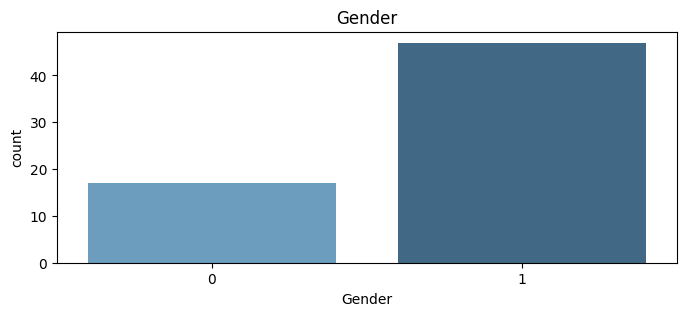

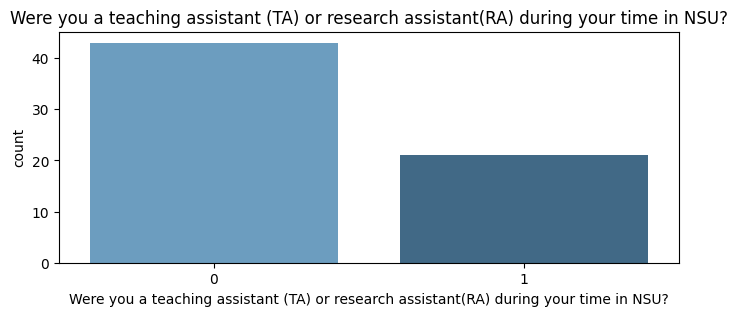

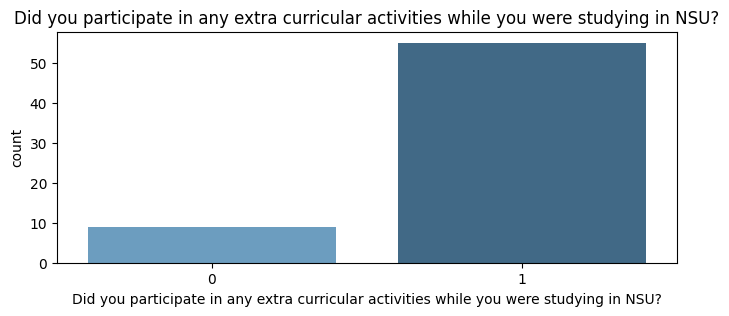

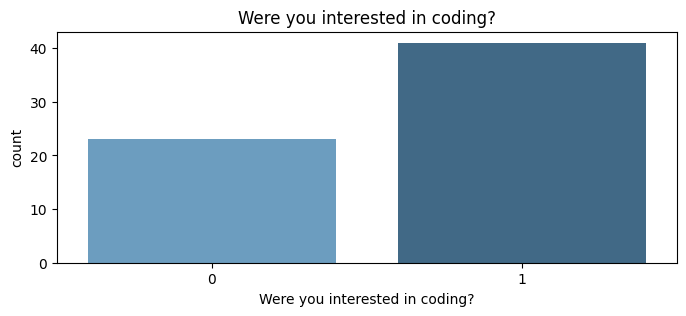

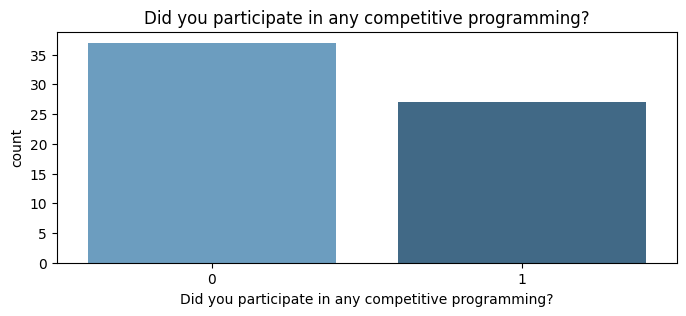

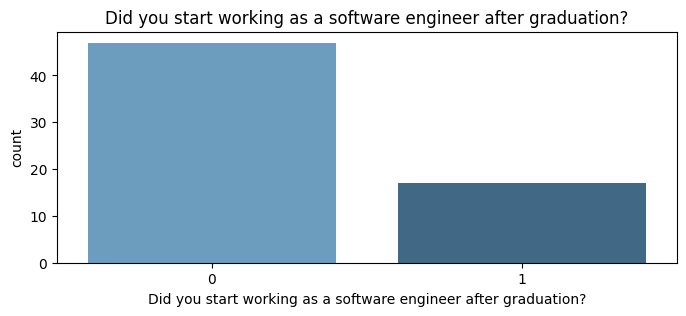

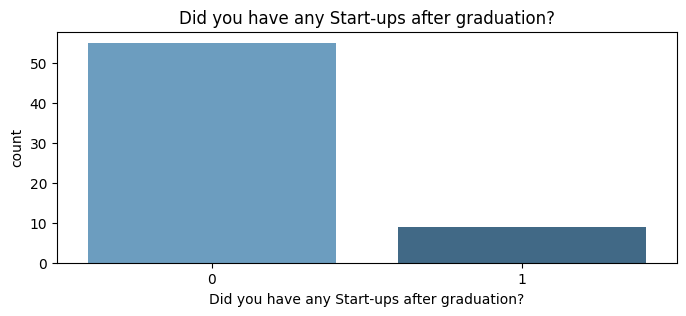

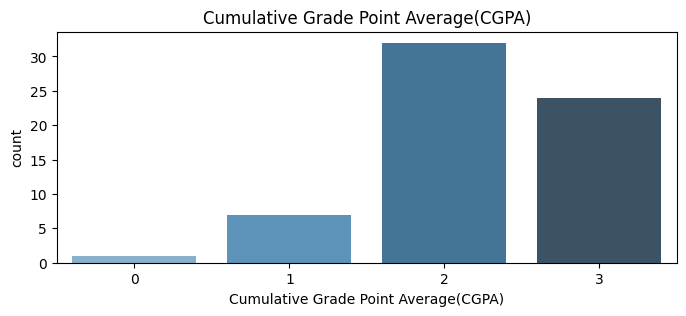

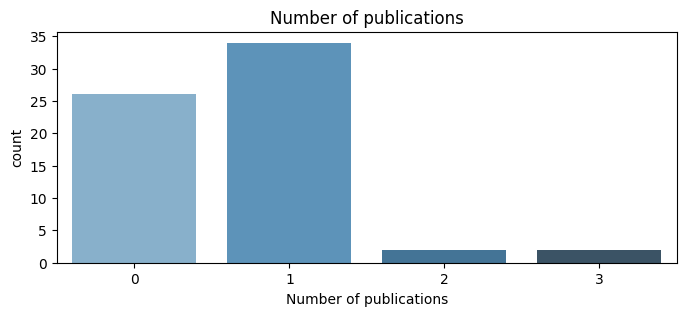

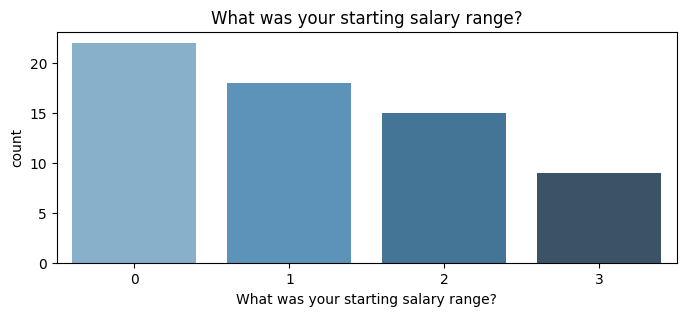

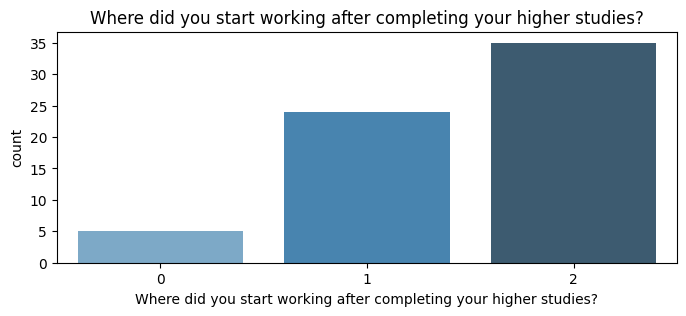

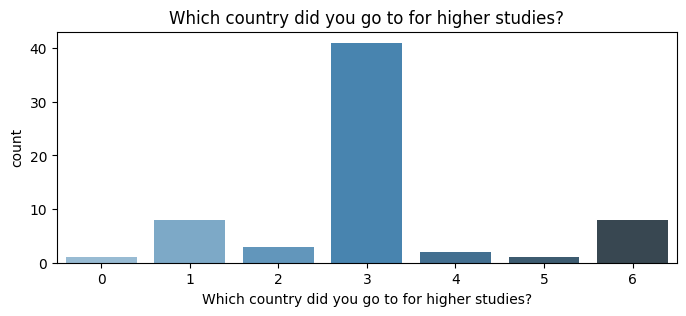

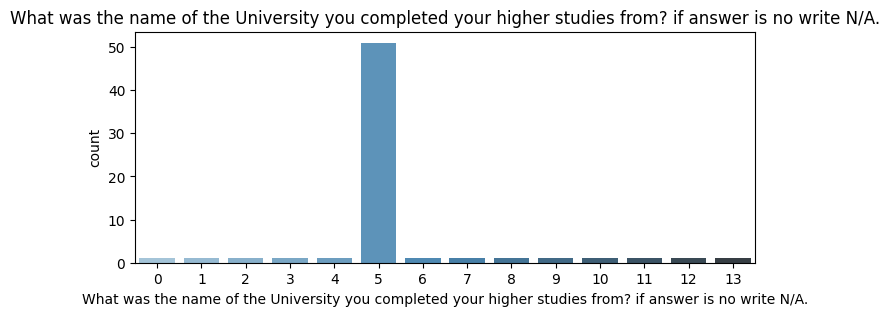

In [3]:
for i in df.columns:
    plt.figure(figsize=(8, 3))
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette="Blues_d")
    plt.title(i)
    plt.show()

In [4]:
df.isnull().sum()

Gender                                                                                                    0
Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?                     0
Did you participate in any extra curricular activities while you were studying in NSU?                    0
Were you interested in coding?                                                                            0
Did you participate in any competitive programming?                                                       0
Did you start working as a software engineer after graduation?                                            0
Did you have any Start-ups after graduation?                                                              0
Cumulative Grade Point Average(CGPA)                                                                      0
Number of publications                                                                                    0
What was your starting salar

In [5]:
df.columns

Index(['Gender',
       'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?',
       'Did you participate in any extra curricular activities while you were studying in NSU?',
       'Were you interested in coding?',
       'Did you participate in any competitive programming?',
       'Did you start working as a software engineer after graduation?',
       'Did you have any Start-ups after graduation?',
       'Cumulative Grade Point Average(CGPA)', 'Number of publications',
       'What was your starting salary range?',
       'Where did you start working after completing your higher studies?',
       'Which country did you go to for higher studies?',
       'What was the name of the University you completed your higher studies from? if answer is no write N/A.'],
      dtype='object')

# Correlation

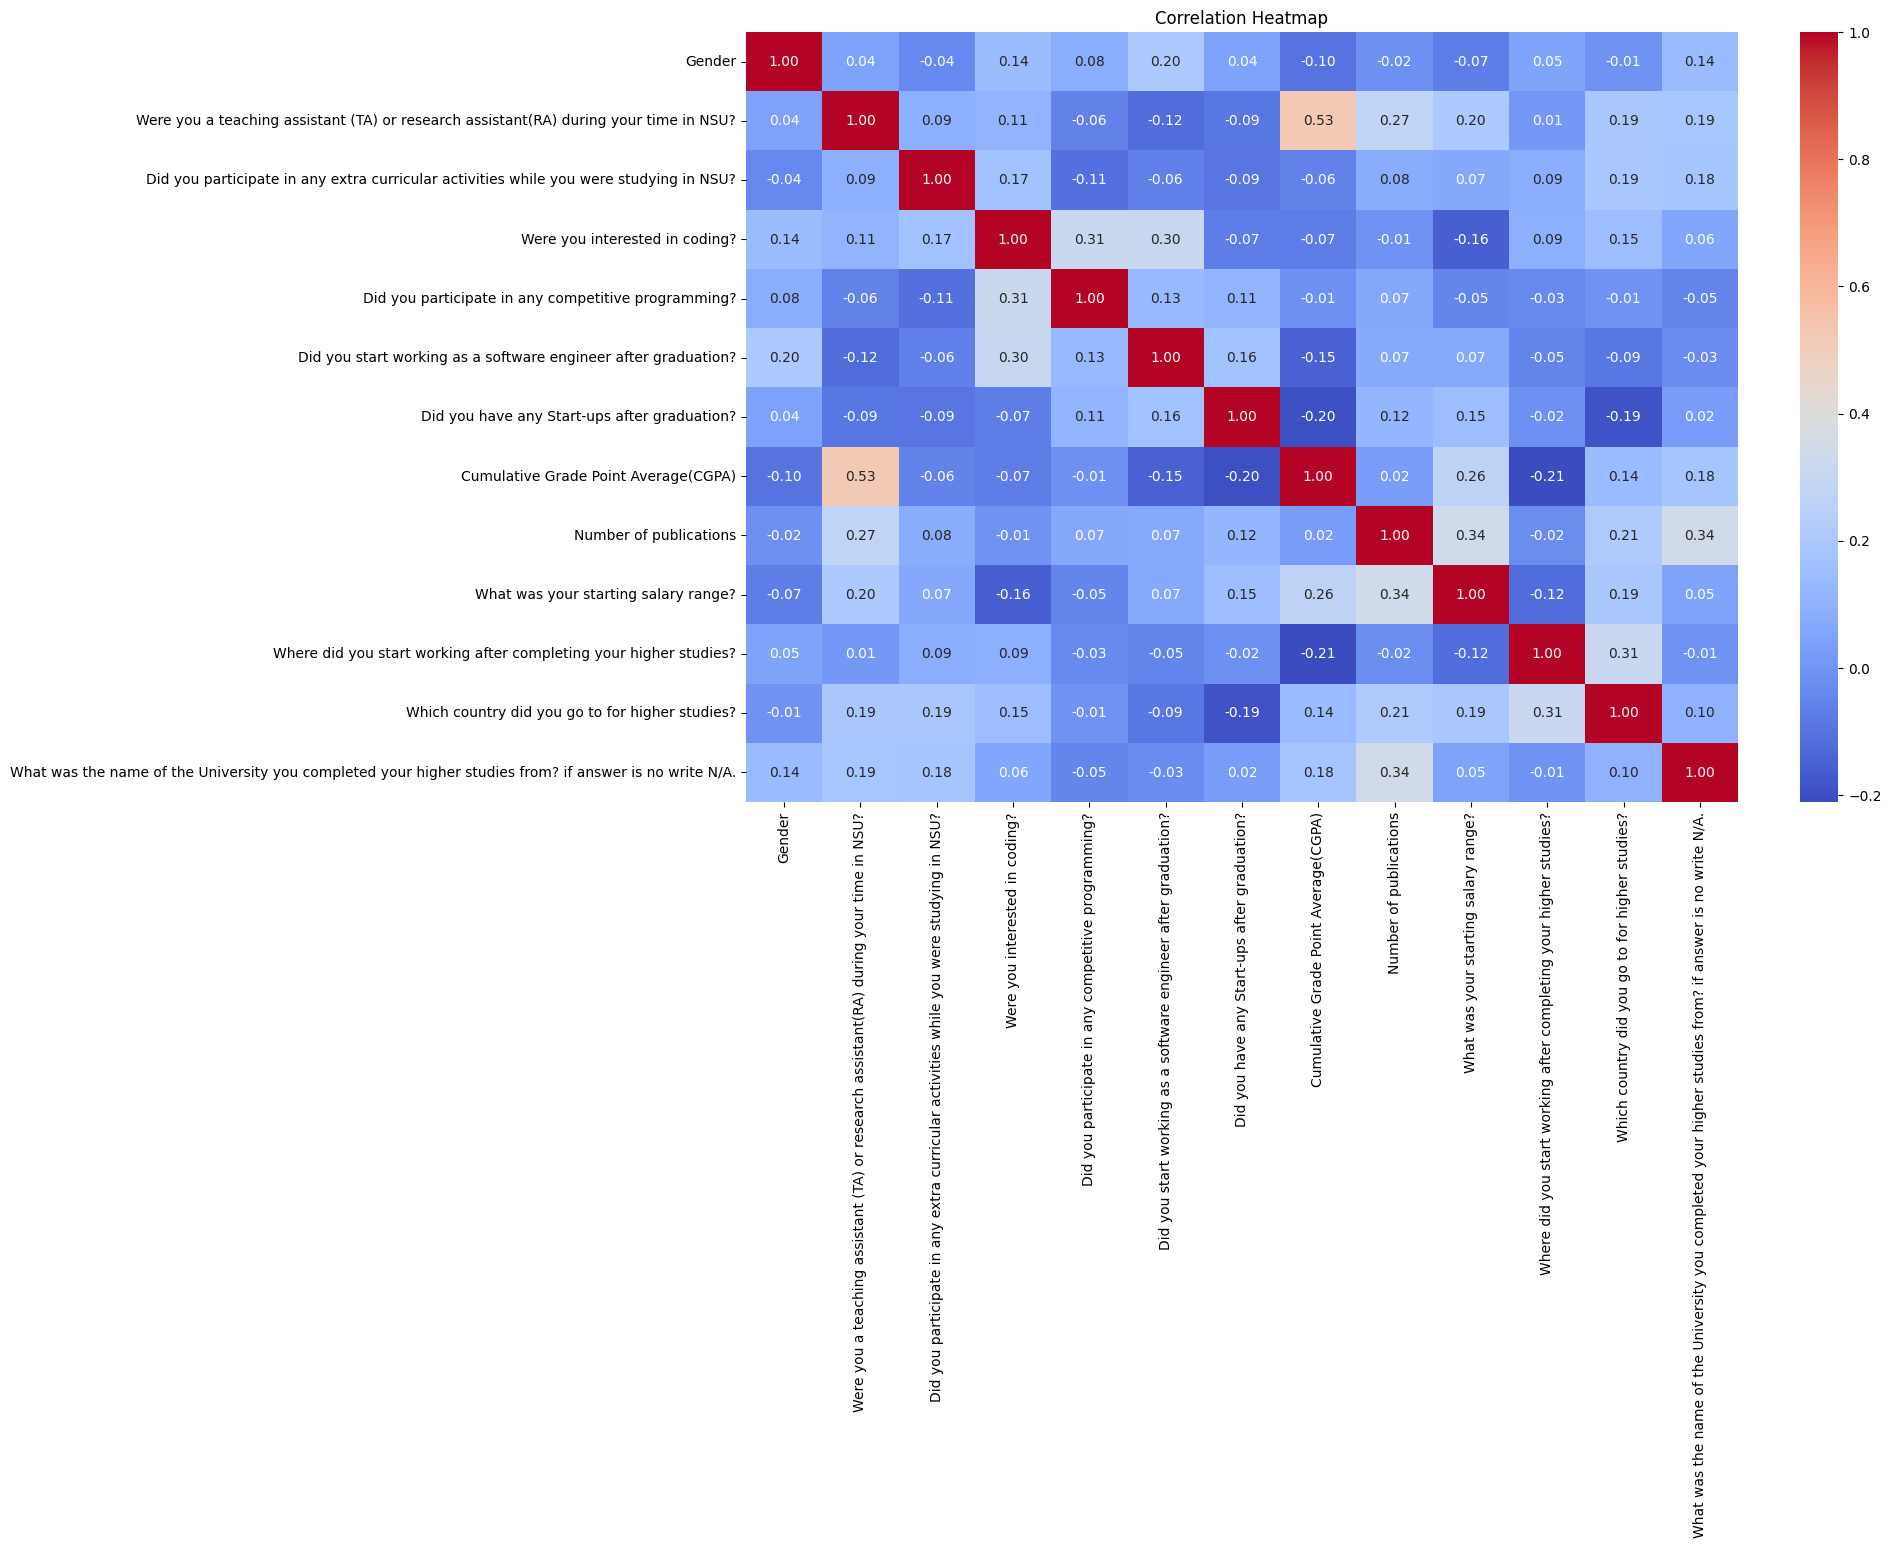

In [6]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### We can see that Some columns have really low correlation with the target variable ('Where did you start working after completing your higher studies?')
## So we drop some of the columns that are low correlated to the target variable

In [7]:
df.drop('What was the name of the University you completed your higher studies from? if answer is no write N/A.', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('Did you participate in any competitive programming?', axis=1, inplace=True)
df.drop('Did you start working as a software engineer after graduation?', axis=1, inplace=True)

# df.drop('Did you participate in any extra curricular activities while you were studying in NSU?', axis=1, inplace=True)
# df.drop('Where did you start working after completing your higher studies?', axis=1, inplace=True)
# df.drop(, axis=1, inplace=True)

df

,Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?,Did you participate in any extra curricular activities while you were studying in NSU?,Were you interested in coding?,Did you have any Start-ups after graduation?,Cumulative Grade Point Average(CGPA),Number of publications,What was your starting salary range?,Where did you start working after completing your higher studies?,Which country did you go to for higher studies?
0,0,1,1,0,2,1,1,1,6
1,1,1,1,0,3,3,2,2,6
2,1,1,1,0,3,1,3,2,6
3,1,1,1,0,3,2,1,0,2
4,0,0,0,0,3,1,1,2,3
...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,3,0,1,1,3
60,0,1,1,0,3,0,0,1,3
61,1,0,1,0,3,0,0,0,1
62,1,1,1,0,3,1,2,2,3


## Making Independant and Dependant Dataframes

In [8]:
X = df.drop('What was your starting salary range?', axis=1)

y = df['What was your starting salary range?']

In [9]:
X.columns

Index(['Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?',
       'Did you participate in any extra curricular activities while you were studying in NSU?',
       'Were you interested in coding?',
       'Did you have any Start-ups after graduation?',
       'Cumulative Grade Point Average(CGPA)', 'Number of publications',
       'Where did you start working after completing your higher studies?',
       'Which country did you go to for higher studies?'],
      dtype='object')

## And splitting them into Train and Test Split
## Test size is 20% and random state is 42

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (51, 8)
X_test shape: (13, 8)
y_train shape: (51,)
y_test shape: (13,)


In [11]:
X_train.isnull().sum()

Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?     0
Did you participate in any extra curricular activities while you were studying in NSU?    0
Were you interested in coding?                                                            0
Did you have any Start-ups after graduation?                                              0
Cumulative Grade Point Average(CGPA)                                                      0
Number of publications                                                                    0
Where did you start working after completing your higher studies?                         0
Which country did you go to for higher studies?                                           0
dtype: int64

# Model Training [KNN]

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
# print(f"\n\n New Iteration {i+1}")

Accuracy: 0.6153846153846154
Confusion Matrix:
 [[5 0 1 0]
 [0 2 0 1]
 [1 1 1 0]
 [1 0 0 0]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.67      0.67         3
           2       0.50      0.33      0.40         3
           3       0.00      0.00      0.00         1

    accuracy                           0.62        13
   macro avg       0.47      0.46      0.46        13
weighted avg       0.60      0.62      0.60        13



# Got an Accuracy of 62%
## Showing the Confusion Matrix

Accuracy: 0.6153846153846154
Precision: 0.5989010989010989
Recall: 0.6153846153846154
F1 Score: 0.6011834319526627


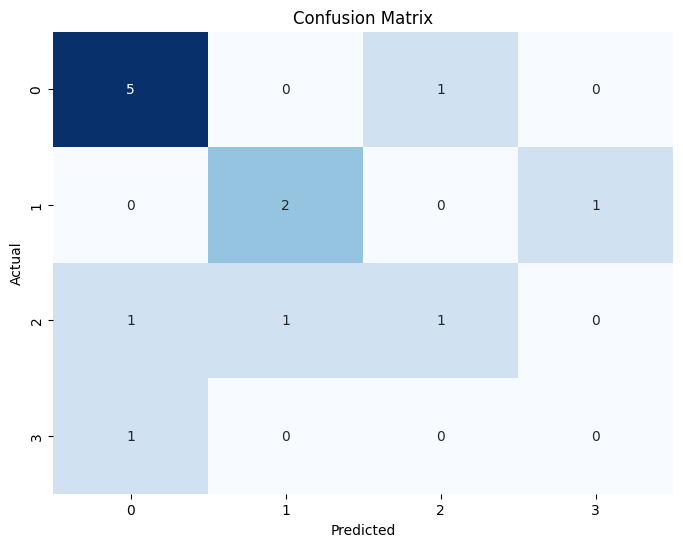

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# For different K values: Range(1-21)

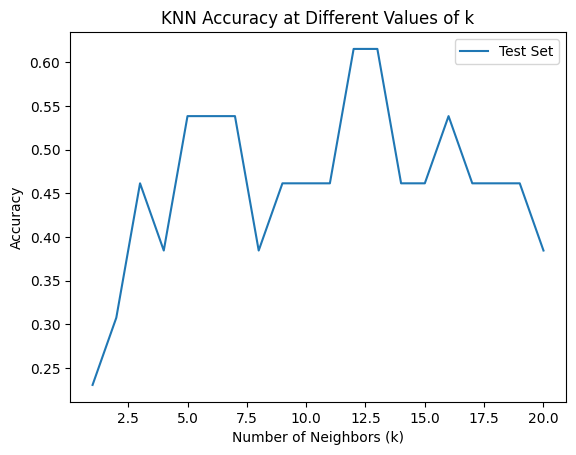

In [15]:
import warnings

# Define a filter to ignore the specific warning
def warn_ignore_attribute_error(message, category, filename, lineno, file=None, line=None):
    if "AttributeError: 'Flags' object has no attribute 'c_contiguous'" in str(message):
        return None
    else:
        return warnings.defaultaction(message, category, filename, lineno, file, line)

# Add the filter to the warnings
warnings.showwarning = warn_ignore_attribute_error

from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1, 21)

# train_accuracy = []
test_accuracy = []

for k in k_values:   
    ####################################################
    from sklearn.metrics import accuracy_score, confusion_matrix

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    
    # train_accuracy.append(mean_cv_acc)
    test_accuracy.append(accuracy)

# plt.plot(k_values, train_accuracy, label='Training Set')
plt.plot(k_values, test_accuracy, label='Test Set')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy at Different Values of k')
plt.legend()
plt.show()

# With Cross Validation [k=6]

Test Accuracy mean: 0.46153846153846156


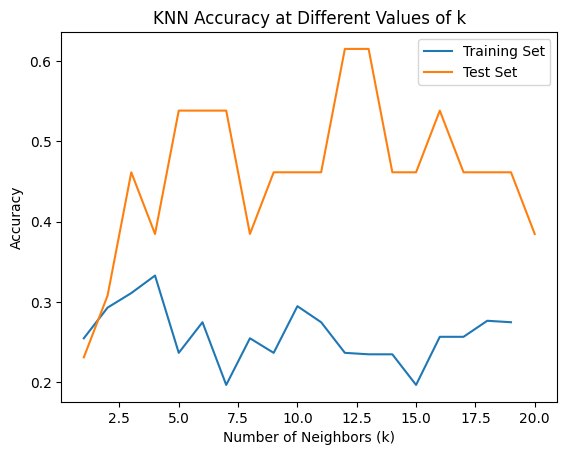

In [20]:
import warnings

# Define a filter to ignore the specific warning
def warn_ignore_attribute_error(message, category, filename, lineno, file=None, line=None):
    if "AttributeError: 'Flags' object has no attribute 'c_contiguous'" in str(message):
        return None
    else:
        return warnings.defaultaction(message, category, filename, lineno, file, line)

# Add the filter to the warnings
warnings.showwarning = warn_ignore_attribute_error

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
k_values = range(1, 21)

train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    cv_knn = cross_val_score(knn, X_train, y_train, cv=5)

    mean_cv_acc = np.mean(cv_knn)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    train_accuracy.append(mean_cv_acc)
    test_accuracy.append(accuracy)
print(f"Test Accuracy mean: {np.mean(test_accuracy)}")
plt.plot(k_values, train_accuracy, label='Training Set')
plt.plot(k_values, test_accuracy, label='Test Set')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy at Different Values of k')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

knn = KNeighborsClassifier(n_neighbors=3)
cv_knn = cross_val_predict(knn, X_train, y_train, cv=8)

precision = precision_score(y_train, cv_knn, average='macro')
recall = recall_score(y_train, cv_knn, average='macro')
print("Precision:", precision)
print("Recall:", recall)

from sklearn.metrics import f1_score
f1 = f1_score(y_train, cv_knn, average='macro')
print("F1 Score:", f1)

accuracy = accuracy_score(y_train, cv_knn)
print(f"Accuracy: {accuracy}")

Precision: 0.42060439560439555
Recall: 0.36354166666666665
F1 Score: 0.3729034123770966
Accuracy: 0.37254901960784315


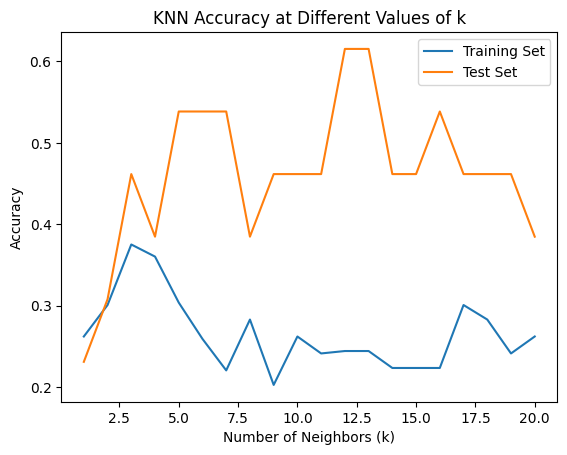

In [18]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
k_values = range(1, 21)

train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    cv_knn = cross_val_score(knn, X_train, y_train, cv=8)

    mean_cv_acc = np.mean(cv_knn)

    prediction_knn = knn.predict(X_test)

    test_acc = accuracy_score(y_test, prediction_knn)

    train_accuracy.append(mean_cv_acc)
    test_accuracy.append(test_acc)

plt.plot(k_values, train_accuracy, label='Training Set')
plt.plot(k_values, test_accuracy, label='Test Set')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy at Different Values of k')
plt.legend()
plt.show()